In [70]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [71]:
import numpy as np
import pandas as pd

In [72]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [74]:
engine = create_engine('sqlite:///hawaii.sqlite')


In [75]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [76]:
# We can view all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [77]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [78]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

      date  precipitation
2016-08-24           0.08
2016-08-24            NaN
2016-08-24           2.15
2016-08-24           2.28
2016-08-24           2.15
2016-08-24           1.45
2016-08-24           1.22
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.02
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.00
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.18
2016-08-27            NaN
2016-08-27           0.00
2016-08-27           0.02
2016-08-28           0.14
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           2.07
2016-08-29           0.04
2016-08-29           0.00
2016-08-29            NaN
2016-08-29           0.17
2016-08-29           0.35
2016-08-29  

<AxesSubplot:xlabel='date'>

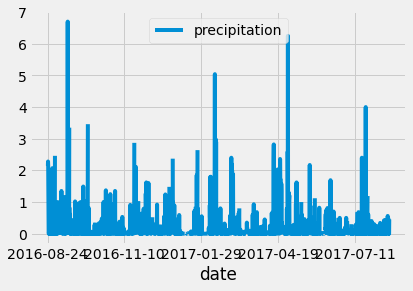

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
results_df = pd.DataFrame(results, columns=['date', 'precipitation'])
results_df.set_index(results_df['date'], inplace=True)

# Sort the dataframe by date
results_df = results_df.sort_index()
print(results_df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
results_df.plot()

In [80]:
# Use Pandas to calcualte the summary statistics for the precipitation data
results_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [86]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()


[(9,)]

In [87]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [89]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    80.0
2    80.0
3    75.0
4    73.0
..    ...
346  77.0
347  77.0
348  76.0
349  76.0
350  79.0

[351 rows x 1 columns]


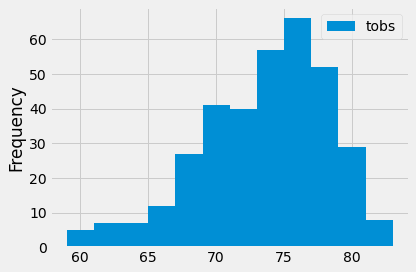

In [110]:
# Choose the station with the highest number of temperature observations.
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

print(df)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df.plot.hist(bins=12)
plt.tight_layout()


In [85]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge